In [56]:
import pandas as pd
%matplotlib inline
from dirtyclean import clean
import numpy as np
import glob

# Reading in the EmoLex

I'm just copying this from the other notebook! It's the one at the very bottom that does a lot of reshaping. I think it's the easiest to work with.

In [57]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


## Reading in Medium articles



In [58]:
df = pd.read_csv("medium_2015.csv", encoding = "ISO-8859-1")

In [59]:
df.head()

,link,min_read,filename,author,publications,description,date,followers,claps,people_clapped,high_text,images,body,tag
0,https://www.google.com/url?q=https://m.signalv...,2,PRESS RELEASE: BASECAMP VALUATION TOPS $100 BI...,Jason Fried,Signal v. Noise,Founder & CEO at Basecamp. Co-author of Gettin...,1-Dec-15,205000,6222,5328,In order to determine the valuation of compani...,Yes,"Basecamp is now a $100 billion dollar company,...",Startup
1,https://medium.com/@damjancvetkovdimitrov/thes...,5,These photos are why IÕm trapped in Tokyo fore...,Damjan Cvetkov-Dimitrov,NaN,I never anticipate ants.. professionally. I al...,25-Nov-15,2200,6340,5607,NaN,Yes,"Tokyo, holy excrements from small undefined cr...",Sci-Fy
2,https://medium.com/the-year-of-the-looking-gla...,2,Average Manager vs. Great Manager,Julie Zhuo,The Year of the Looking Glass,Product design VP,11-Aug-15,179000,8700,7034,NaN,Yes,Sketches,Management
3,https://medium.com/interactive-mind/mobile-201...,7,Mobile:2015 UI/UX Trends,Onur Oral,Interactive Mind,Designer of things.,31-Jul-15,2300,4814,4766,Apps which have well-done micro-interactions c...,Yes,"Whether on an app screen, a web browser, or a ...",NaN
4,https://medium.com/firm-narrative/want-a-bette...,5,Want a Better Pitch? Watch This.,Andy Raskin,NaN,Helping leaders tell strategic stories.,NaN,20000,7447,6226,"ÒIt lacksÊoomph,Ó she said. ÒThe information i...",Yes,"Three weeks ago, the CMO of a San Francisco st...",Startup


In [60]:
df = df.rename(columns={'body': 'content'})

In [61]:
df.content = df.content.apply(str)

In [62]:
df["content"] = df["content"].apply(clean)

In [63]:
df.shape

(15, 14)

In [64]:
df.head()

,link,min_read,filename,author,publications,description,date,followers,claps,people_clapped,high_text,images,content,tag
0,https://www.google.com/url?q=https://m.signalv...,2,PRESS RELEASE: BASECAMP VALUATION TOPS $100 BI...,Jason Fried,Signal v. Noise,Founder & CEO at Basecamp. Co-author of Gettin...,1-Dec-15,205000,6222,5328,In order to determine the valuation of compani...,Yes,Basecamp is now a billion dollar company accor...,Startup
1,https://medium.com/@damjancvetkovdimitrov/thes...,5,These photos are why IÕm trapped in Tokyo fore...,Damjan Cvetkov-Dimitrov,NaN,I never anticipate ants.. professionally. I al...,25-Nov-15,2200,6340,5607,NaN,Yes,Tokyo holy excrements from small undefined cre...,Sci-Fy
2,https://medium.com/the-year-of-the-looking-gla...,2,Average Manager vs. Great Manager,Julie Zhuo,The Year of the Looking Glass,Product design VP,11-Aug-15,179000,8700,7034,NaN,Yes,Sketches,Management
3,https://medium.com/interactive-mind/mobile-201...,7,Mobile:2015 UI/UX Trends,Onur Oral,Interactive Mind,Designer of things.,31-Jul-15,2300,4814,4766,Apps which have well-done micro-interactions c...,Yes,Whether on an app screen a web browser or a we...,NaN
4,https://medium.com/firm-narrative/want-a-bette...,5,Want a Better Pitch? Watch This.,Andy Raskin,NaN,Helping leaders tell strategic stories.,NaN,20000,7447,6226,"ÒIt lacksÊoomph,Ó she said. ÒThe information i...",Yes,Three weeks ago the CMO of a San Francisco sta...,Startup


In [65]:
emolex_df['word'].head(3)

0      aback
1     abacus
2    abandon
Name: word, dtype: object

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(df['content'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005051
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [67]:
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [68]:
emolex_df[emolex_df.anger == 1].head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0
17,abhor,1,0,1,1,0,1,0,0,0,0
18,abhorrent,1,0,1,1,0,1,0,0,0,0
27,abolish,1,0,0,0,0,1,0,0,0,0


In [69]:
# Get your list of positive words

angry_words = emolex_df[emolex_df.anger == 1]['word']

positive_words = emolex_df[emolex_df.positive == 1]['word']


# Get your list of sadness words
sadness_words = emolex_df[emolex_df.sadness == 1]['word']


# Get your list of surprise words
surprise_words = emolex_df[emolex_df.surprise == 1]['word']


# Get your list of disgust words
disgust_words = emolex_df[emolex_df.disgust == 1]['word']


# Get your list of anticipation words
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']


# Get your list of negative words
negative_words = emolex_df[emolex_df.negative == 1]['word']



# Get your list of joy words
joy_words = emolex_df[emolex_df.joy == 1]['word']


# Get your list of trust words
trust_words = emolex_df[emolex_df.trust == 1]['word']



# Get your list of fear words
fear_words = emolex_df[emolex_df.fear == 1]['word']




In [70]:
df.head(3)

,link,min_read,filename,author,publications,description,date,followers,claps,people_clapped,high_text,images,content,tag
0,https://www.google.com/url?q=https://m.signalv...,2,PRESS RELEASE: BASECAMP VALUATION TOPS $100 BI...,Jason Fried,Signal v. Noise,Founder & CEO at Basecamp. Co-author of Gettin...,1-Dec-15,205000,6222,5328,In order to determine the valuation of compani...,Yes,Basecamp is now a billion dollar company accor...,Startup
1,https://medium.com/@damjancvetkovdimitrov/thes...,5,These photos are why IÕm trapped in Tokyo fore...,Damjan Cvetkov-Dimitrov,NaN,I never anticipate ants.. professionally. I al...,25-Nov-15,2200,6340,5607,NaN,Yes,Tokyo holy excrements from small undefined cre...,Sci-Fy
2,https://medium.com/the-year-of-the-looking-gla...,2,Average Manager vs. Great Manager,Julie Zhuo,The Year of the Looking Glass,Product design VP,11-Aug-15,179000,8700,7034,NaN,Yes,Sketches,Management


In [71]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positivity'] = wordcount_df[positive_words].sum(axis=1)


df['joy'] = wordcount_df[joy_words].sum(axis=1)


df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)


df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)




In [72]:
df.head(10)

,link,min_read,filename,author,publications,description,date,followers,claps,people_clapped,...,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,https://www.google.com/url?q=https://m.signalv...,2,PRESS RELEASE: BASECAMP VALUATION TOPS $100 BI...,Jason Fried,Signal v. Noise,Founder & CEO at Basecamp. Co-author of Gettin...,1-Dec-15,205000,6222,5328,...,0.033333,0.175000,0.058333,0.000000,0.050000,0.158333,0.091667,0.016667,0.025000,0.008333
1,https://medium.com/@damjancvetkovdimitrov/thes...,5,These photos are why IÕm trapped in Tokyo fore...,Damjan Cvetkov-Dimitrov,NaN,I never anticipate ants.. professionally. I al...,25-Nov-15,2200,6340,5607,...,0.050505,0.252525,0.085859,0.050505,0.050505,0.131313,0.101010,0.045455,0.101010,0.050505
2,https://medium.com/the-year-of-the-looking-gla...,2,Average Manager vs. Great Manager,Julie Zhuo,The Year of the Looking Glass,Product design VP,11-Aug-15,179000,8700,7034,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,https://medium.com/interactive-mind/mobile-201...,7,Mobile:2015 UI/UX Trends,Onur Oral,Interactive Mind,Designer of things.,31-Jul-15,2300,4814,4766,...,0.007407,0.264198,0.056790,0.002469,0.012346,0.101235,0.066667,0.009877,0.039506,0.029630
4,https://medium.com/firm-narrative/want-a-bette...,5,Want a Better Pitch? Watch This.,Andy Raskin,NaN,Helping leaders tell strategic stories.,NaN,20000,7447,6226,...,0.037190,0.214876,0.045455,0.012397,0.012397,0.086777,0.123967,0.020661,0.086777,0.033058
5,https://medium.com/building-asana/work-hard-li...,5,"Work Hard, Live Well",Dustin Moskovitz,Building Asana,NaN,20-Aug-15,16000,5169,4799,...,0.033582,0.235075,0.093284,0.011194,0.041045,0.130597,0.082090,0.037313,0.126866,0.029851
6,https://byrslf.co/you-re-only-23-stop-rushing-...,4,YouÕre only 23. Stop rushing life.,Susie Pan,Life Tips.,"Life wanderer, world traveler, serial entrepre...",9-Dec-15,3100,5259,5055,...,0.030612,0.255102,0.076531,0.015306,0.040816,0.091837,0.147959,0.051020,0.102041,0.040816
7,https://medium.com/the-mission/never-tell-peop...,3,Never Tell People What You Do,Bruce Kasanoff,Life Learning,Social media ghostwriter. LinkedIn Influencer.,9-Sep-15,3200,4942,4784,...,0.040650,0.252033,0.048780,0.016260,0.016260,0.097561,0.081301,0.024390,0.073171,0.016260
8,https://medium.com/message/you-are-not-late-b3...,4,You Are Not Late,Kevin Kelly,The Message,"Senior Maverick at Wired, Cool Tools maven, au...",27-Jul-14,15500,5894,5255,...,0.030675,0.177914,0.067485,0.024540,0.024540,0.073620,0.122699,0.030675,0.079755,0.036810
9,https://medium.com/@tommauchline/15-things-i-l...,3,15 things I learnt about Islam and British val...,Thomas Mauchline,NaN,Builds digital campaigns around people and dat...,6-Dec-15,975,5164,4569,...,0.045045,0.288288,0.153153,0.009009,0.054054,0.162162,0.153153,0.036036,0.063063,0.063063


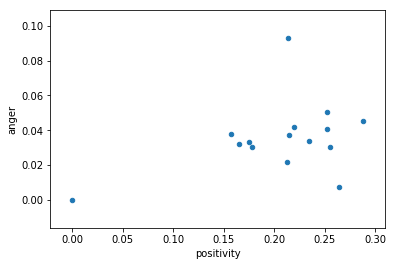

In [73]:
df.plot(x='positivity', y='anger', kind='scatter')

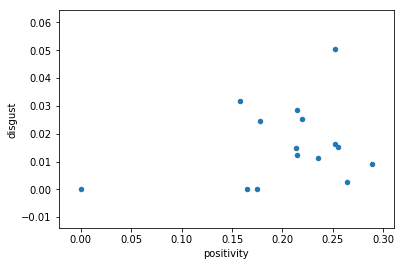

In [74]:
df.plot(x='positivity', y='disgust', kind='scatter')

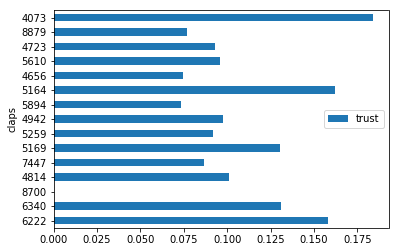

In [75]:
df.plot(x='claps', y='trust', kind='barh')

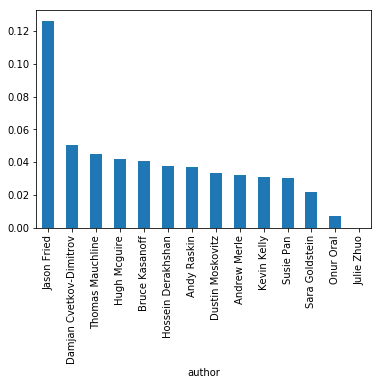

In [76]:
df.groupby('author')['anger'].sum().sort_values(ascending = False).plot(kind='bar')

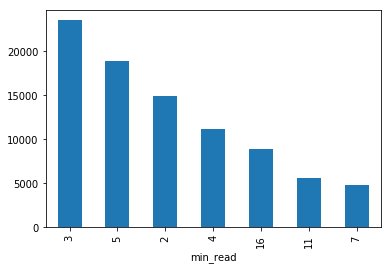

In [77]:
df.groupby('min_read')['claps'].sum().sort_values(ascending = False).plot(kind='bar')

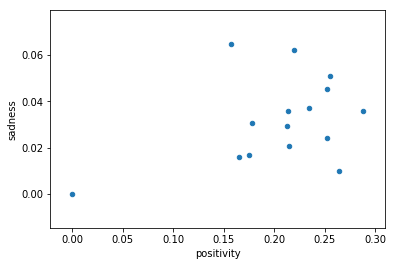

In [78]:
df.plot(x='positivity', y='sadness', kind='scatter')

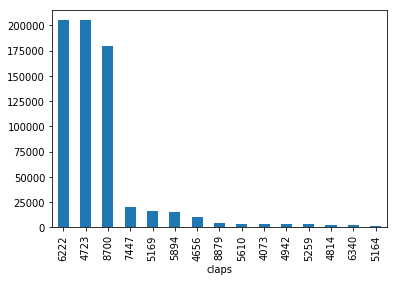

In [79]:
df.groupby('claps')['followers'].sum().sort_values(ascending = False).plot(kind='bar')

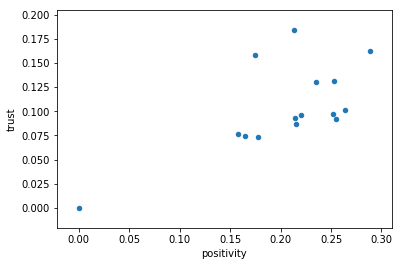

In [80]:
df.plot(x='positivity', y='trust', kind='scatter')

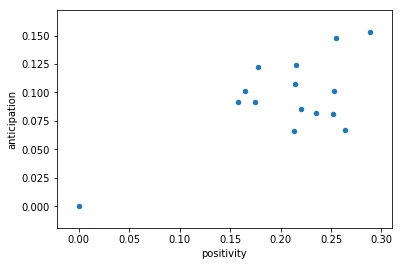

In [81]:
df.plot(x='positivity', y='anticipation', kind='scatter')

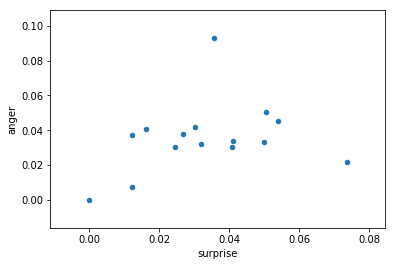

In [82]:
df.plot(x='surprise', y='anger', kind='scatter')

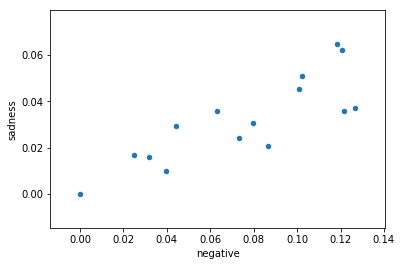

In [83]:
df.plot(x='negative', y='sadness', kind='scatter')

In [84]:
content = df['content']

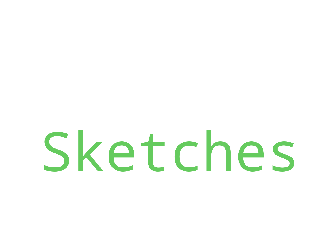

people       0.243612
time         0.214548
day          0.164036
make         0.142118
years        0.140311
today        0.125181
work         0.124925
back         0.124893
things       0.098151
life         0.089442
thing        0.088377
company      0.080632
world        0.078633
morning      0.074060
school       0.062062
early        0.061970
valuation    0.058333
books        0.057811
start        0.057447
question     0.057097
wrong        0.056008
year         0.055793
idea         0.054952
musk         0.049452
culture      0.048864
learn        0.048858
read         0.048713
stuff        0.048362
design       0.046914
easy         0.045875
move         0.045719
talk         0.045522
face         0.042496
feel         0.042181
billion      0.041667
web          0.040320
future       0.039393
reading      0.038795
means        0.038622
business     0.038480
kid          0.038421
full         0.037761
lot          0.036957
answer       0.036776
telling      0.035699
attention 

In [85]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                         stopwords=STOPWORDS,
                         background_color='white',
                         width=1200,
                         height=1000).generate(content[2])

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
 
wordcount_df.sum().sort_values(ascending=False).head(50)

In [86]:
df.to_csv('medium_emotions.csv', index = False, encoding='utf-8')

In [87]:
#day = df['date'].str.extract('(\d\d\d\d-\d\d?-\d\d)')
#df['day'] = df['date'].str.extract('(\d\d\d\d-\d\d?-\d\d)')
#df.head()

In [88]:
#df.groupby('day')['anger'].sum().sort_values(ascending = False).plot(kind='bar')

In [89]:
#df.groupby('day')['positivity'].sum().sort_values(ascending = False).plot(kind='bar')